### Week 11 Assignment Programming Exercises
**Name: Jinyang Yu**  
**Date: Mar 25, 2023**

In [22]:
import glob 
import numpy
import pandas as pd
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jinyang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1. Import Corpus

In [45]:
review_path = '../data/poems/reviewed/*.txt'
random_path = '../data/poems/random/*.txt'
review_files = glob.glob(review_path)
random_files = glob.glob(random_path)
review_texts = [open(file_name, encoding='utf-8').read() for file_name in review_files]
random_texts = [open(file_name, encoding='utf-8').read() for file_name in random_files]

In [46]:
df_review = pd.DataFrame({'filename': review_files, 'text': review_texts})
df_random = pd.DataFrame({'filename': random_files, 'text': random_texts})
df=pd.concat([df_review,df_random])

In [47]:
def parse_filename(filename):
    filename_parts = filename.split('/')
    author_title_year = filename_parts[-1].split(' ')
    author = ' '.join(author_title_year[1:3])
    title = ' '.join(author_title_year[3:-1])
    year = author_title_year[-1].replace('.txt', '')
    return author, title, year

In [48]:
df[['author', 'title', 'year']] = pd.DataFrame(df['filename'].apply(parse_filename).tolist(), index=df.index)
df_review[['author', 'title', 'year']] = pd.DataFrame(df_review['filename'].apply(parse_filename).tolist(), index=df_review.index)
df_random[['author', 'title', 'year']] = pd.DataFrame(df_random['filename'].apply(parse_filename).tolist(), index=df_random.index)
df_random

,filename,text,author,title,year
0,"../data/poems/random/113 Eilshemius, Louis M. ...",the the the the the the the the the the the th...,"Eilshemius, Louis",M. All about girls,1907
1,"../data/poems/random/688 Kennedy, William, Fit...",the the the the the the the the the the the th...,"Kennedy, William,",Fitful fancies,1827
2,"../data/poems/random/606 Cooper, Thomas, The p...",the the the the the the the the the the the th...,"Cooper, Thomas,",The purgatory of suicides,1845
3,"../data/poems/random/161 Pickett, Anita Truema...",the the the the the the the the the the the th...,"Pickett, Anita","Trueman, Philo-sophia;",1901
4,"../data/poems/random/105 Hough, Alfred J. Egyp...",the the the the the the the the the the the th...,"Hough, Alfred",J. Egyptian melodies,1911
...,...,...,...,...,...
347,"../data/poems/random/89 Gladden, Washington, U...",the the the the the the the the the the the th...,"Gladden, Washington,","Ultima veritas, and other verses",1912
348,"../data/poems/random/102 Phipps, Sarah Metcalf...",the the the the the the the the the the the th...,"Phipps, Sarah",Metcalf. Thoughts in rhyme,1911
349,"../data/poems/random/129 Ehrmann, Max, Breakin...",and and and and and and and and and and and an...,"Ehrmann, Max,",Breaking home ties,1904
350,"../data/poems/random/241 Văcărescu, Elena, T...",the the the the the the the the the the the th...,"Văcărescu, Elena,",The bard of the Dimbovitza,1891


*The split between author and title is not perfect--for some articles, there are parts of author names in titles. The split only aims to give approximate idea about author names and titles.

## 2. Fit a Topic Model, using LDA

### reviewed text

In [49]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [58]:
# Vectorize our text using CountVectorizer
print("Extracting tf features in review text for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.80, min_df=0.20,
                                max_features=None,
                                stop_words='english'
                                )

tf_review = tf_vectorizer.fit_transform(df_review.text)

Extracting tf features in review text for LDA...


In [60]:
n_topics = 4
n_top_words = 20

print("Fitting LDA models with tf_review features, "
      "n_samples=%d and n_topics=%d..."
      % (n_samples, n_topics))



#define the lda function, with desired options
#Check the documentation, linked above, to look through the options
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=20,
                                learning_method='online',
                                learning_offset=80.,
                                total_samples=len(df_review),
                                random_state=0)
#fit the model
lda.fit(tf_review)

Fitting LDA models with tf_review features, n_samples=357 and n_topics=4...


LatentDirichletAllocation(learning_method='online', learning_offset=80.0,
                          max_iter=20, n_components=4, random_state=0,
                          total_samples=357)

In [61]:
#print the top words per topic, using the function defined above.
#Unlike R, which has a built-in function to print top words, we have to write our own for scikit-learn
#I think this demonstrates the different aims of the two packages: R is for social scientists, Python for computer scientists

print("\nTopics in reviewed text with LDA model:")
tf_feature_names_review = tf_vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names_review, n_top_words)


Topics in reviewed text with LDA model:

Topic #0:
hath oft st twas scene hast doth fancy glorious bliss th tear dread mid fond fame mortal given view tomb

Topic #1:
hath spake gods hast sword queen battle war son kings nay doth hall shalt host brother wilt drew yea eve

Topic #2:
ll wife ve lady town quite sir law nay self women street does body book fine wish got girl says

Topic #3:
hath roses forest autumn sang sunset lady lover doth woods sunshine softly forever desire poet slowly ago mid afar mist



The first topic could be happiness and death (fancy, glorious, fame, bliss; mortal, tomb, dread, tear); the second topic could be kingdom and war (sword, queen, battle, war, kings); the third topic could be women (wife, lady, women, girl); the last topic could be nature (rose, forest, autumn, sunset, woods, sunshine).

### random text

In [62]:
# Vectorize our text using CountVectorizer
print("Extracting tf features in random text for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.80, min_df=0.20,
                                max_features=None,
                                stop_words='english'
                                )

tf_random = tf_vectorizer.fit_transform(df_random.text)

Extracting tf features in random text for LDA...


In [63]:
n_topics = 4
n_top_words = 20

print("Fitting LDA models with tf_random features, "
      "n_samples=%d and n_topics=%d..."
      % (len(df_random), n_topics))



#define the lda function, with desired options
#Check the documentation, linked above, to look through the options
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=20,
                                learning_method='online',
                                learning_offset=80.,
                                total_samples=len(df_random),
                                random_state=0)
#fit the model
lda.fit(tf_random)

Fitting LDA models with tf_random features, n_samples=352 and n_topics=4...


LatentDirichletAllocation(learning_method='online', learning_offset=80.0,
                          max_iter=20, n_components=4, random_state=0,
                          total_samples=352)

In [64]:
print("\nTopics in random text with LDA model:")
tf_feature_names_random = tf_vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names_random, n_top_words)


Topics in random text with LDA model:

Topic #0:
teacher school teaching quite study taught teach answer ve read hath branches order minds quiet questions early anxious parents labour

Topic #1:
jesus hath sin saviour christ heavenly angels eternal throne glorious lo angel mid unto hast doth sacred bliss behold cross

Topic #2:
ve grey hair bird river woman today grew hath door silver kiss wood lady rain took black twas pale boy

Topic #3:
war proud country view hath th bosom scene foe state fame sons chief freedom noble spread son dread sacred twas



The first topic could be study (teacher, school, study, taught, teach, answer, read, questions, parents); the second topic could be Christianity (jesus, sin, christ, heavenly, angel, eternal, sacred, cross); the third topic could be women and nature (bird, river, wood, rain; woman, lady); the last topic could be country, war and proud (war, proud, country, state, fame, sons, noble, sacred).

Comparing the results of reviewed text and random text, reviewed text focused more on happiness and death than random text, while random text were more about study and Christianity.

### 3. Document by Topic Distribution

### reviewed text

In [68]:
n_topics = 4
n_top_words = 20

print("Fitting LDA models with tf_review features, "
      "n_samples=%d and n_topics=%d..."
      % (len(df_review), n_topics))



#define the lda function, with desired options
#Check the documentation, linked above, to look through the options
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=20,
                                learning_method='online',
                                learning_offset=80.,
                                total_samples=len(df_review),
                                random_state=0)
#fit the model
lda.fit(tf_review)

Fitting LDA models with tf_review features, n_samples=357 and n_topics=4...


LatentDirichletAllocation(learning_method='online', learning_offset=80.0,
                          max_iter=20, n_components=4, random_state=0,
                          total_samples=357)

In [67]:
topic_dist_review = lda.transform(tf_review)
topic_dist_review

array([[3.49682108e-01, 6.83702084e-03, 1.65233264e-01, 4.78247607e-01],
       [4.38633673e-01, 1.03654735e-01, 3.16487116e-01, 1.41224475e-01],
       [6.37705273e-01, 3.70936438e-04, 3.29706870e-02, 3.28953104e-01],
       ...,
       [8.46452517e-02, 4.90056578e-01, 8.07697066e-04, 4.24490473e-01],
       [1.03016616e-01, 1.03166501e-04, 2.45056920e-01, 6.51823298e-01],
       [8.82405053e-01, 3.54486185e-02, 8.17408480e-02, 4.05480139e-04]])

In [69]:
topic_dist_df_review = pd.DataFrame(topic_dist_review)
df_w_topics_review = topic_dist_df_review.join(df_review)
df_w_topics_review

,0,1,2,3,filename,text,author,title,year
0,0.349682,0.006837,0.165233,0.478248,"../data/poems/reviewed/689 Hood, Thomas, The p...",the the the the the the the the the the the th...,"Hood, Thomas,",The plea of the midsummer fairies,1827
1,0.438634,0.103655,0.316487,0.141224,"../data/poems/reviewed/524 Mackay, Charles, A ...",the the the the the the the the the the the th...,"Mackay, Charles,",A man's heart,1860
2,0.637705,0.000371,0.032971,0.328953,"../data/poems/reviewed/383 Colman, James F. Th...",the the the the the the the the the the the th...,"Colman, James","F. The knightly heart, and other poems",1873
3,0.006718,0.276516,0.232636,0.484130,"../data/poems/reviewed/580 Browning, Elizabeth...",the the the the the the the the the the the th...,"Browning, Elizabeth","Barrett, Poems",1853
4,0.000109,0.423846,0.041953,0.534092,"../data/poems/reviewed/431 Myers, F. W. H. Poe...",the the the the the the the the the the the th...,"Myers, F.",W. H. Poems,1870
...,...,...,...,...,...,...,...,...,...
352,0.349532,0.414648,0.081246,0.154574,"../data/poems/reviewed/307 Palgrave, Francis T...",the the the the the the the the the the the th...,"Palgrave, Francis","Turner, The visions of England",1881
353,0.126024,0.311665,0.042112,0.520198,"../data/poems/reviewed/578 Arnold, Edwin, Poem...",the the the the the the the the the the the th...,"Arnold, Edwin,","Poems, narrative and lyrical",1853
354,0.084645,0.490057,0.000808,0.424490,"../data/poems/reviewed/217 McCulloch, Hugh, Th...",the the the the the the the the the the the th...,"McCulloch, Hugh,",The quest of Heracles and other poems,1893
355,0.103017,0.000103,0.245057,0.651823,"../data/poems/reviewed/391 Turner, Eliza (Spro...",the the the the the the the the the the the th...,"Turner, Eliza",(Sproat) Out-of-door rhymes,1872


In [73]:
print(df_w_topics_review[['title', 'author','year', 0]].sort_values(by=[0], ascending=False).head(5))

                                title               author  year         0
24                          sceptic ;          Hemans, The  1820  0.999952
29                      Satan, a poem  Montgomery, Robert,  1830  0.999897
276                             Poems     Barton, Bernard,  1820  0.999886
290      and historic scenes in verse        Hemans, Tales  1819  0.999875
257  A New Year's Eve and Other Poems     Barton, Bernard,  1828  0.999836


In [74]:
print(df_w_topics_review[['title', 'author','year', 1]].sort_values(by=[1], ascending=False).head(5))

                                                 title              author  \
136  The story of Sigurd the Volsung and the fall o...    Morris, William,   
137                               The fall of Nineveh;  Atherstone, Edwin,   
318                               The fall of Nineveh;  Atherstone, Edwin,   
247                                    Israel in Egypt  Atherstone, Edwin,   
326        Love is enough, or The freeing of Pharamond    Morris, William,   

     year         1  
136  1881  0.999964  
137  1828  0.999932  
318  1828  0.999916  
247  1861  0.999141  
326  1873  0.883265  


In [75]:
print(df_w_topics_review[['title', 'author','year', 2]].sort_values(by=[2], ascending=False).head(5))

                                  title             author  year         2
192               The ring and the book  Browning, Robert,  1869  0.999936
91                         E. Betsy Lee          Brown, T.  1873  0.999516
320       Wetmore, Grimm tales made gay        Carryl, Guy  1902  0.999466
323                       Wilson, Fires    Gibson, Wilfrid  1912  0.999385
313  S. Prufrock and other observations          Eliot, T.  1917  0.998753


In [76]:
print(df_w_topics_review[['title', 'author','year', 3]].sort_values(by=[3], ascending=False).head(5))

                                          title             author  year  \
87                    Elizabeth Prescott, Poems  Spofford, Harriet  1882   
217                  Hall, Love and liberation;     Wheelock, John  1913   
106  The cruise of the Mystery, and other poems    Thaxter, Celia,  1886   
131                 Julius, A voice on the wind    Cawein, Madison  1902   
44                                        Poems    Thaxter, Celia,  1872   

            3  
87   0.999802  
217  0.999788  
106  0.999633  
131  0.999580  
44   0.999576  


Above showing the representative texts for each topic of reviewed texts, which enables researchers to engage with the full texts. Also, we can observe that certain topic was more prevalent in certain time period. For example, representative texts for the first topic were all written between 1820 and 1830.

In [72]:
n_topics = 4
n_top_words = 20

print("Fitting LDA models with tf_random features, "
      "n_samples=%d and n_topics=%d..."
      % (len(df_random), n_topics))



#define the lda function, with desired options
#Check the documentation, linked above, to look through the options
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=20,
                                learning_method='online',
                                learning_offset=80.,
                                total_samples=len(df_random),
                                random_state=0)
#fit the model
lda.fit(tf_random)

Fitting LDA models with tf_random features, n_samples=352 and n_topics=4...


LatentDirichletAllocation(learning_method='online', learning_offset=80.0,
                          max_iter=20, n_components=4, random_state=0,
                          total_samples=352)

In [77]:
topic_dist_random = lda.transform(tf_random)
topic_dist_df_random = pd.DataFrame(topic_dist_random)
df_w_topics_random = topic_dist_df_random.join(df_random)
df_w_topics_random

,0,1,2,3,filename,text,author,title,year
0,0.000047,0.107716,0.870881,0.021356,"../data/poems/random/113 Eilshemius, Louis M. ...",the the the the the the the the the the the th...,"Eilshemius, Louis",M. All about girls,1907
1,0.000058,0.111478,0.353293,0.535171,"../data/poems/random/688 Kennedy, William, Fit...",the the the the the the the the the the the th...,"Kennedy, William,",Fitful fancies,1827
2,0.000015,0.229360,0.013657,0.756968,"../data/poems/random/606 Cooper, Thomas, The p...",the the the the the the the the the the the th...,"Cooper, Thomas,",The purgatory of suicides,1845
3,0.000083,0.729054,0.145397,0.125465,"../data/poems/random/161 Pickett, Anita Truema...",the the the the the the the the the the the th...,"Pickett, Anita","Trueman, Philo-sophia;",1901
4,0.000067,0.280134,0.713144,0.006656,"../data/poems/random/105 Hough, Alfred J. Egyp...",the the the the the the the the the the the th...,"Hough, Alfred",J. Egyptian melodies,1911
...,...,...,...,...,...,...,...,...,...
347,0.000078,0.390976,0.597749,0.011197,"../data/poems/random/89 Gladden, Washington, U...",the the the the the the the the the the the th...,"Gladden, Washington,","Ultima veritas, and other verses",1912
348,0.000251,0.268230,0.731262,0.000257,"../data/poems/random/102 Phipps, Sarah Metcalf...",the the the the the the the the the the the th...,"Phipps, Sarah",Metcalf. Thoughts in rhyme,1911
349,0.000357,0.035610,0.877118,0.086915,"../data/poems/random/129 Ehrmann, Max, Breakin...",and and and and and and and and and and and an...,"Ehrmann, Max,",Breaking home ties,1904
350,0.000082,0.000085,0.999750,0.000083,"../data/poems/random/241 Văcărescu, Elena, T...",the the the the the the the the the the the th...,"Văcărescu, Elena,",The bard of the Dimbovitza,1891


In [78]:
print(df_w_topics_random[['title', 'author','year', 0]].sort_values(by=[0], ascending=False).head(5))

                                                 title           author  year  \
19                                      M., Pedagogics    Crider, Henry  1866   
327  Jay. [from old catalog] The veteran's qualific...    Stone, Jasper  1890   
119                            The hermit of Moss Pond  Pitcher, James,  1896   
142                   Edward, Poems of school and life   White, Charles  1916   
26                             D. England's last queen      Wallace, E.  1871   

            0  
19   0.999456  
327  0.058048  
119  0.033253  
142  0.009287  
26   0.001262  


In [79]:
print(df_w_topics_random[['title', 'author','year', 1]].sort_values(by=[1], ascending=False).head(5))

                                   title           author  year         1
316          E. Songs for the new life ;    Jones, Darius  1869  0.999965
101                        Under a cloud   Sawers, Eliza.  1867  0.999929
59                     Lyra eucharistica   Shipley, Orby,  1863  0.999885
313                     The morning star   Seibert, John.  1882  0.999560
257  [from old catalog] Leisure moments;  Elder, William.  1862  0.999060


In [80]:
print(df_w_topics_random[['title', 'author','year', 2]].sort_values(by=[2], ascending=False).head(5))

                                    title               author  year         2
304  The collected poems of Rupert Brooke      Brooke, Rupert,  1915  0.999800
281                    Songs of Cy Warman          Warman, Cy,  1911  0.999800
60                           Summer songs   Collins, Mortimer,  1860  0.999795
44                The flower of old Japan       Noyes, Alfred,  1903  0.999787
350            The bard of the Dimbovitza  Văcărescu, Elena,  1891  0.999750


In [81]:
print(df_w_topics_random[['title', 'author','year', 3]].sort_values(by=[3], ascending=False).head(5))

                                                 title            author  \
85                                         King Alfred   Fitchett, John,   
124  Sylvius. The wrongs of Ireland historically re...        Law, James   
95                                            Slavery;  Woodward, David.   
336                                           Cornubia  Woodley, George,   
314                                     Gay. Lynmouth;   Copleston, John   

     year         3  
85   1841  0.999981  
124  1831  0.999941  
95   1856  0.999878  
336  1819  0.999869  
314  1835  0.999191  


### 4. Words Aligned with each Topic

### reviewed text

In [85]:
#first create word count column

df_w_topics_review['word_count'] = df_w_topics_review['text'].apply(lambda x: len(str(x).split()))

#multiple topic weight by word count

df_w_topics_review['0_wc'] = df_w_topics_review[0] * df_w_topics_review['word_count']

In [84]:
#create a for loop to do this for every topic
topic_columns = range(0, n_topics)
col_list = []
for num in topic_columns:
    col = "%d_wc" % num
    col_list.append(col)
    #Solution
    df_w_topics_review[col] = df_w_topics_review[num] * df_w_topics_review['word_count']
    
df_w_topics_review.head()

,0,1,2,3,filename,text,author,title,year,word_count,0_wc,1_wc,2_wc,3_wc
0,0.349682,0.006837,0.165233,0.478248,"../data/poems/reviewed/689 Hood, Thomas, The p...",the the the the the the the the the the the th...,"Hood, Thomas,",The plea of the midsummer fairies,1827,28193,9858.587672,192.756129,4658.421421,13483.234778
1,0.438634,0.103655,0.316487,0.141224,"../data/poems/reviewed/524 Mackay, Charles, A ...",the the the the the the the the the the the th...,"Mackay, Charles,",A man's heart,1860,18356,8051.559710,1902.686320,5809.437505,2592.316466
2,0.637705,0.000371,0.032971,0.328953,"../data/poems/reviewed/383 Colman, James F. Th...",the the the the the the the the the the the th...,"Colman, James","F. The knightly heart, and other poems",1873,35631,22722.076574,13.216836,1174.778549,11720.928041
3,0.006718,0.276516,0.232636,0.484130,"../data/poems/reviewed/580 Browning, Elizabeth...",the the the the the the the the the the the th...,"Browning, Elizabeth","Barrett, Poems",1853,62551,420.248604,17296.349042,14551.586093,30282.816261
4,0.000109,0.423846,0.041953,0.534092,"../data/poems/reviewed/431 Myers, F. W. H. Poe...",the the the the the the the the the the the th...,"Myers, F.",W. H. Poems,1870,13866,1.509465,5877.048104,581.725116,7405.717316


### random text

In [87]:
df_w_topics_random['word_count'] = df_w_topics_random['text'].apply(lambda x: len(str(x).split()))

topic_columns = range(0, n_topics)
col_list = []
for num in topic_columns:
    col = "%d_wc" % num
    col_list.append(col)
    #Solution
    df_w_topics_random[col] = df_w_topics_random[num] * df_w_topics_random['word_count']
    
df_w_topics_random.head()

,0,1,2,3,filename,text,author,title,year,word_count,0_wc,1_wc,2_wc,3_wc
0,0.000047,0.107716,0.870881,0.021356,"../data/poems/random/113 Eilshemius, Louis M. ...",the the the the the the the the the the the th...,"Eilshemius, Louis",M. All about girls,1907,25708,1.204825,2769.157249,22388.606324,549.031602
1,0.000058,0.111478,0.353293,0.535171,"../data/poems/random/688 Kennedy, William, Fit...",the the the the the the the the the the the th...,"Kennedy, William,",Fitful fancies,1827,19129,1.114229,2132.465825,6758.136855,10237.283091
2,0.000015,0.229360,0.013657,0.756968,"../data/poems/random/606 Cooper, Thomas, The p...",the the the the the the the the the the the th...,"Cooper, Thomas,",The purgatory of suicides,1845,65812,0.998033,15094.614914,898.776528,49817.610525
3,0.000083,0.729054,0.145397,0.125465,"../data/poems/random/161 Pickett, Anita Truema...",the the the the the the the the the the the th...,"Pickett, Anita","Trueman, Philo-sophia;",1901,14873,1.237257,10843.227234,2162.491883,1866.043626
4,0.000067,0.280134,0.713144,0.006656,"../data/poems/random/105 Hough, Alfred J. Egyp...",the the the the the the the the the the the th...,"Hough, Alfred",J. Egyptian melodies,1911,17838,1.186694,4997.022003,12721.067460,118.723843


## 5. Topic Prevalence over time

### reviewed text

In [88]:
grouped_year_review = df_w_topics_review[['0_wc', '1_wc', '2_wc', '3_wc', 'year']].groupby('year').mean()
grouped_year_review

,0_wc,1_wc,2_wc,3_wc
year,,,,
1816,2025.398932,0.870167,0.857129,0.873772
1819,11032.186696,394.068502,459.238031,1.173437
1820,26491.489349,1245.122402,3624.357635,2414.030614
1823,15602.271157,5560.286387,2972.747382,759.195075
1824,13598.867275,671.592965,716.914766,479.624994
...,...,...,...,...
1914,536.688649,576.990589,5822.771291,6234.318701
1915,1.514467,390.382032,2057.741788,3387.561713
1916,1010.079009,591.614647,7617.920940,6219.185404


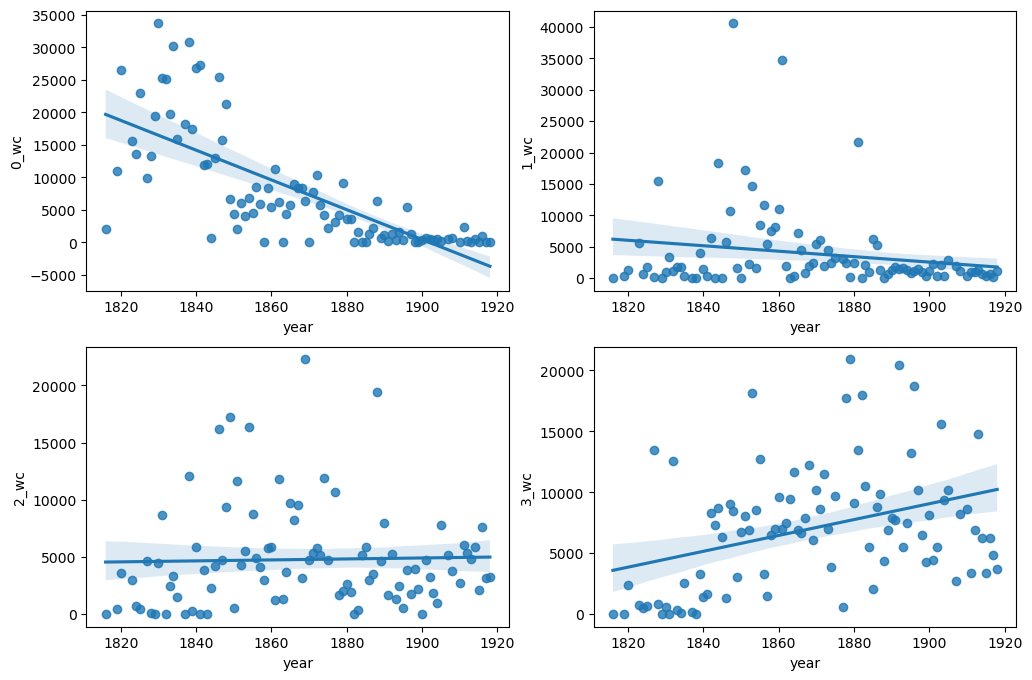

In [98]:
grouped_year_review.index = grouped_year_review.index.astype(int) 

import seaborn as sns
import matplotlib.pyplot as plt

# Create the 2x2 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

sns.regplot(x=grouped_year_review.index, y = '0_wc', data = grouped_year_review, ax=axs[0, 0])
sns.regplot(x=grouped_year_review.index, y = '1_wc', data = grouped_year_review,ax=axs[0, 1])
sns.regplot(x=grouped_year_review.index, y = '2_wc', data = grouped_year_review,ax=axs[1, 0])
sns.regplot(x=grouped_year_review.index, y = '3_wc', data = grouped_year_review,ax=axs[1, 1])
plt.show()

From the plots we can see that poems that were related to the first topic(happiness and death) and the second topic(kingdom and war) reduced over year, poems that were related to the third topic(women) kept consistent, while poems that were related to the fourth topic(nature) increased over year.

### random text

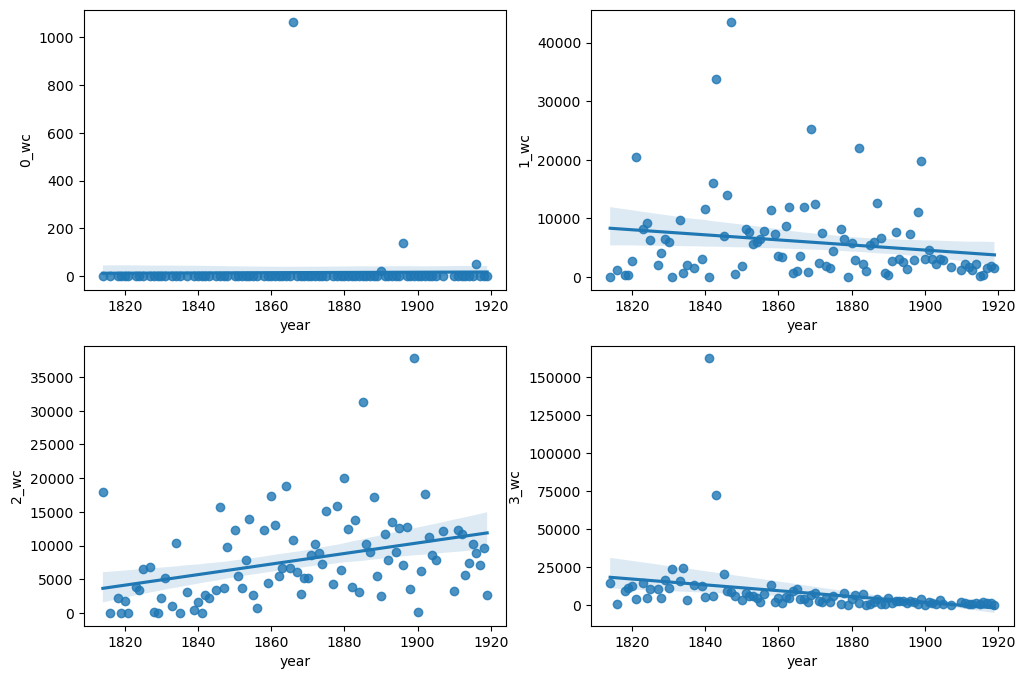

In [102]:
grouped_year_random = df_w_topics_random[['0_wc', '1_wc', '2_wc', '3_wc', 'year']].groupby('year').mean()
grouped_year_random.index = grouped_year_random.index.astype(int) 

# Create the 2x2 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

sns.regplot(x=grouped_year_random.index, y = '0_wc', data = grouped_year_random,ax=axs[0, 0])
sns.regplot(x=grouped_year_random.index, y = '1_wc', data = grouped_year_random,ax=axs[0, 1])
sns.regplot(x=grouped_year_random.index, y = '2_wc', data = grouped_year_random,ax=axs[1, 0])
sns.regplot(x=grouped_year_random.index, y = '3_wc', data = grouped_year_random,ax=axs[1, 1])
plt.show()

From the plots we can see that there were only four poems that were related to the first topic (study), which indeed is a weird topic to be put into poems. Poems that were related to the second topic(Christanity) and the fourth topic(country, war and proud) reduced over year, while poems that were mostly related to the third topic(women and nature) increased over year. The result is consistent with the changing trend of topics in reviewed text, where the word counts of poems with topics for women and nature increased and the word counts of poems with the topic for kingdom and war decreased.